### Домашнее задание http://prntscr.com/ujddtw

##### 1. Возьмите датасет Mortality and Water Hardness
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

##### 2 Есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

#####  3 Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
# данные
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

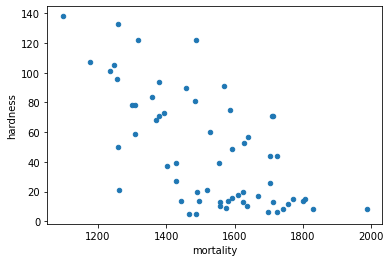

In [53]:
# точечный график
# обратная связь - чем выше жесткость, тем меньше смертность, не очень сильня, тк большой разброс + много точек для низкой жесткости с разной смертностью
df.plot(kind='scatter', x='mortality', y='hardness')

In [54]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [55]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Итог: Оба коэффициента корреляции показывают наличие обратной связи.


#### Модель линейной регрессии

In [56]:
# данные 
X = df[['mortality']]
y = df['hardness']

# выделяю тестовую выборку 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# модель ЛР на выборке для обучения 
model = LinearRegression()
model.fit(X_train, y_train)

# коэффициенты модели
print(model.coef_)
print(model.intercept_)

[-0.12670202]
239.3678426140957


Уравнение линейной регрессии
у = -0.12670202 * х + 239.3678426140957

In [57]:
# коэффициент детерминации
model.score(X, y) 

0.42728747748890683

Коэффициент детерминации 43% - невысокий.

In [58]:
# применяем модель к тестовой выборке
y_pred = model.predict(X_test)

# коэффициент детерминации по тестовой выборке
model.score(X_test, y_test)

0.4948982822876836

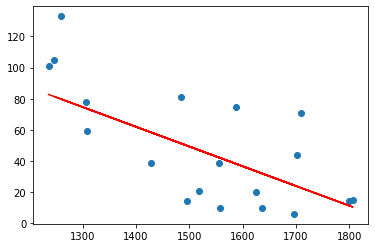

In [59]:
# график остатков
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

При разделении датафрейма на северные и южные городов по отдельности модель становится еще менее точной, см. ниже:
    коэффициенты детерминации 37% для Юга и 38 для Севера.    

### Разделение на Север и Юг

#### Корреляция

In [60]:
df_south = df.loc[df['location'] == 'South']
df_north = df.loc[df['location'] == 'North']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

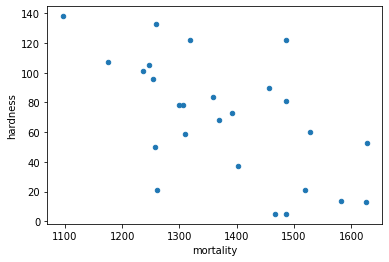

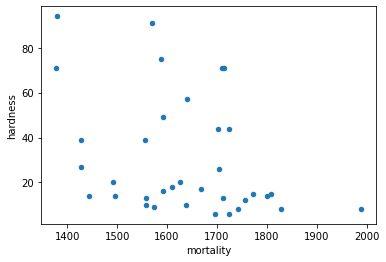

In [61]:
# точечный график
# для южных городов обратная взаимосвязь еще просматривается, для северных уже меньше
# коэффициенты корреляции подьверждают это наблюдение
df_south.plot(kind='scatter', x='mortality', y='hardness')
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [62]:
# считаем коэф. корреляции Пирсона   ЮГ
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [63]:
# считаем коэф. корреляции Пирсона  СЕВЕР
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [64]:
# считаем коэф. корреляции Спирмана   ЮГ
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [65]:
# считаем коэф. корреляции Спирмана  СЕВЕР
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


#### Линейная регрессия
 
! Не очень много данных для построения. 

[-0.18112812]
324.11907462359864
0.3718994011990817


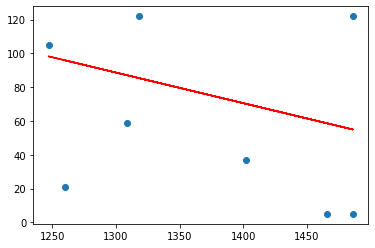

In [66]:
# Модель для ЮГА
X_south = df_south[['mortality']]
y_south = df_south['hardness']

# выделяю тестовую выборку 
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.3, random_state=42)

# построение модели ЛР на выборке для обучения 
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)

# коэффициенты модели
print(model_south.coef_)
print(model_south.intercept_)

# коэффициент детерминации
print(model_south.score(X, y))

# применяем модель к тестовой выборке
y_south_pred = model_south.predict(X_south_test)

# коэффициент детерминации по тестовой выборке
model_south.score(X_south_test, X_south_test)

# график остатков
plt.scatter(X_south_test, y_south_test)
plt.plot(X_south_test, y_south_pred, c='r')

[-0.09774218]
191.72797679112006
0.38506188390406326


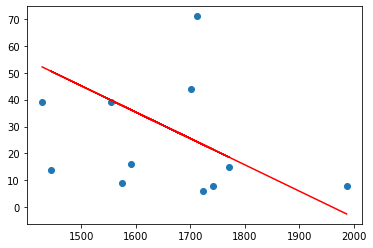

In [49]:
# Модель для СЕВЕРА
X_north = df_north[['mortality']]
y_north = df_north['hardness']

# выделяю тестовую выборку 
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.3, random_state=42)

# построение модели ЛР на выборке для обучения 
model_north = LinearRegression()
model_north.fit(X_north_train, y_north_train)

# коэффициенты модели
print(model_north.coef_)
print(model_north.intercept_)

# коэффициент детерминации
print(model_north.score(X, y))

# применяем модель к тестовой выборке
y_north_pred = model_north.predict(X_north_test)

# коэффициент детерминации по тестовой выборке
model_north.score(X_north_test, X_north_test)

# график остатков
plt.scatter(X_north_test, y_north_test)
plt.plot(X_north_test, y_north_pred, c='r')